<a href="https://colab.research.google.com/github/PriyankaYadav0113/Python-Projects/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Yulu Hypothesis Testing**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, f_oneway , chi2_contingency

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/OdinSchoolDataFrames/yulu_bike_sharing_dataset.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include="object")

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


In [ ]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


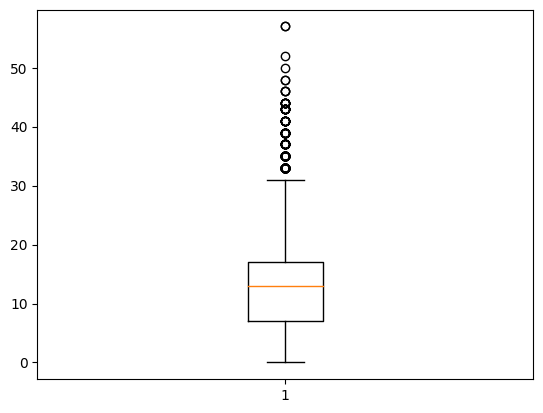

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df["windspeed"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q1 = 7.00
Q3 = 16.99
IQR_windspeed = Q3-Q1
lower_limit = Q1 - 1.5*IQR_windspeed
upper_limit = Q3 + 1.5*IQR_windspeed
print("IQR_windspeed ", IQR_windspeed)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)

IQR_windspeed  9.989999999999998
lower_limit  -7.984999999999998
upper_limit  31.974999999999994


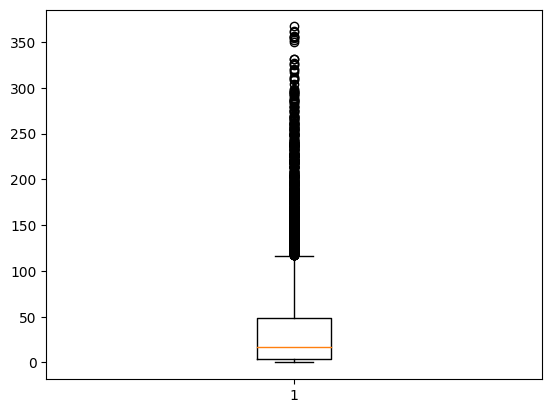

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df["casual"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q1 = 4
Q3 = 49
IQR_casual = Q3-Q1
lower_limit = Q1 - 1.5*IQR_casual
upper_limit = Q3 + 1.5*IQR_casual
print("IQR_casual ", IQR_casual)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)

IQR_casual  45
lower_limit  -63.5
upper_limit  116.5


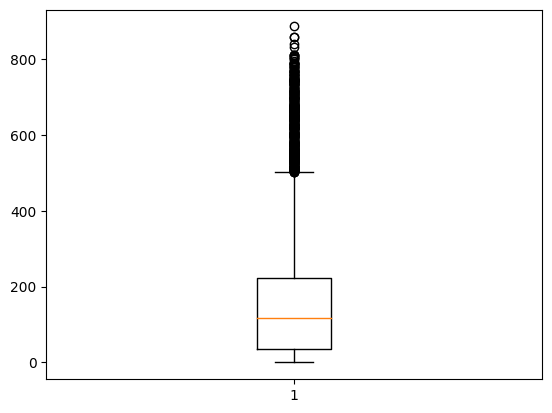

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df["registered"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q1 = 36
Q3 = 222
IQR_registered = Q3-Q1
lower_limit = Q1 - 1.5*IQR_registered
upper_limit = Q3 + 1.5*IQR_registered
print("IQR_registered ", IQR_registered)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)

IQR_registered  186
lower_limit  -243.0
upper_limit  501.0


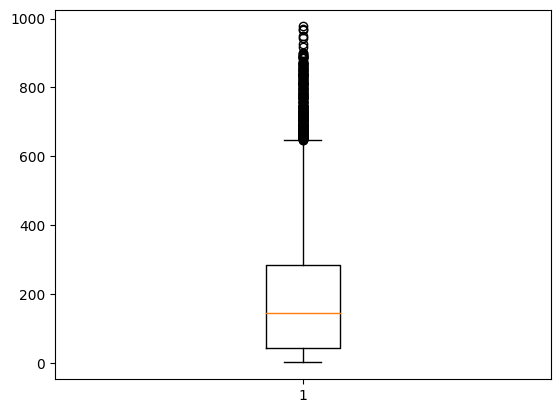

<Figure size 1000x700 with 0 Axes>

In [ ]:
plt.boxplot(df["count"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [ ]:
Q1 = 42
Q3 = 284
IQR_count = Q3-Q1
lower_limit = Q1 - 1.5*IQR_count
upper_limit = Q3 + 1.5*IQR_count
print("IQR_count ", IQR_count)
print("lower_limit ", lower_limit)
print("upper_limit ", upper_limit)

IQR_count  242
lower_limit  -321.0
upper_limit  647.0


**Windspeed:**

IQR_windspeed 9.989999999999998

lower_limit -7.984999999999998

upper_limit 31.974999999999994

**Casual:**

IQR_casual 45

lower_limit -63.5

upper_limit 116.5

**Registered:**

IQR_registered 186

lower_limit -243.0

upper_limit 501.0

**Count:**

IQR_count 242

lower_limit -321.0

upper_limit 647.0

**Univariate Analysis**

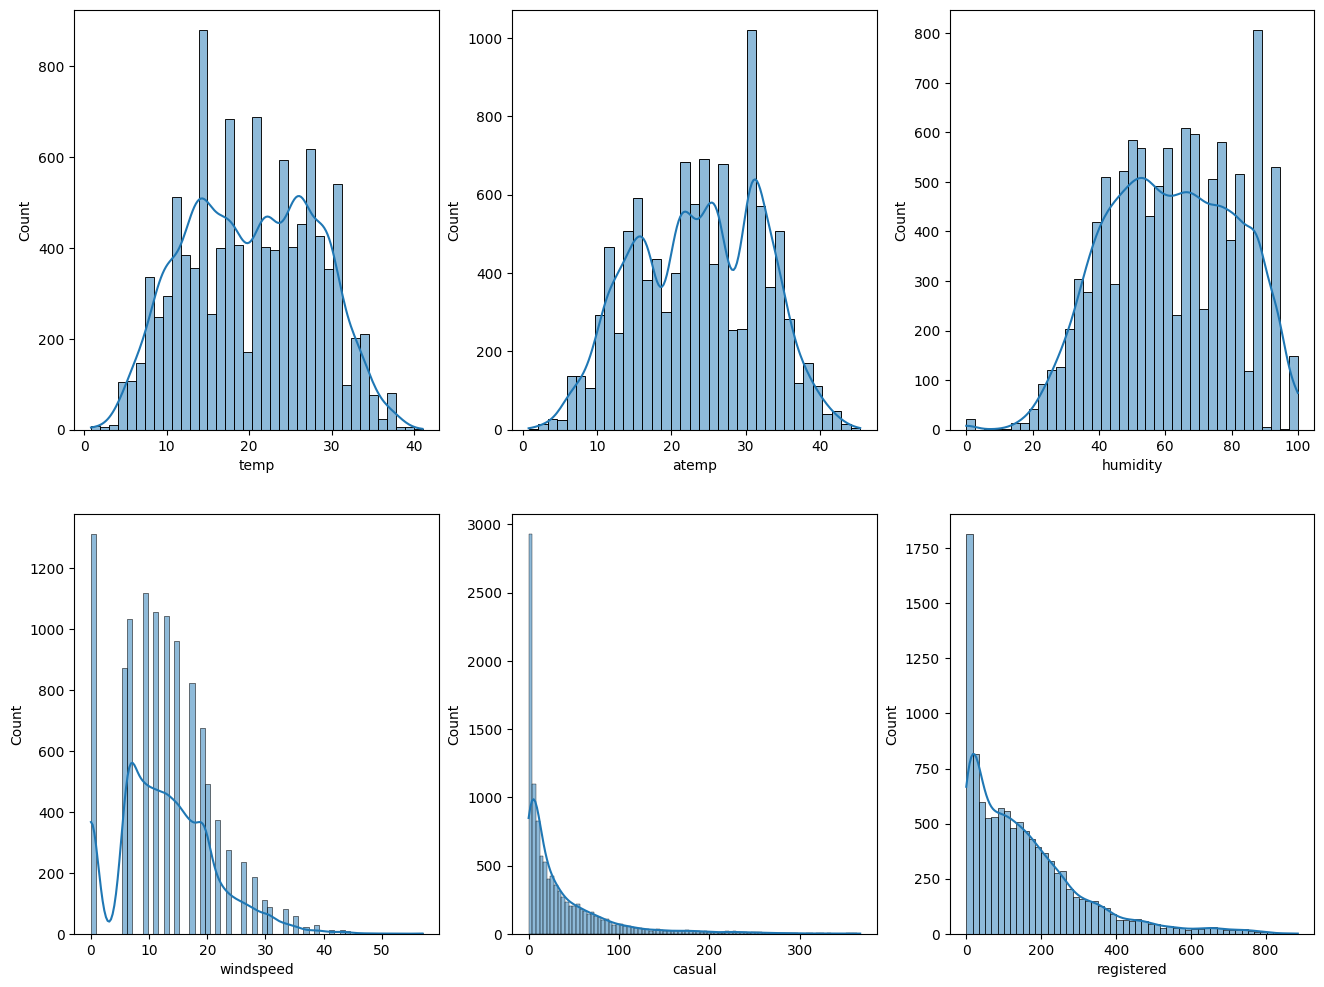

In [ ]:
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig,axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_col[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()

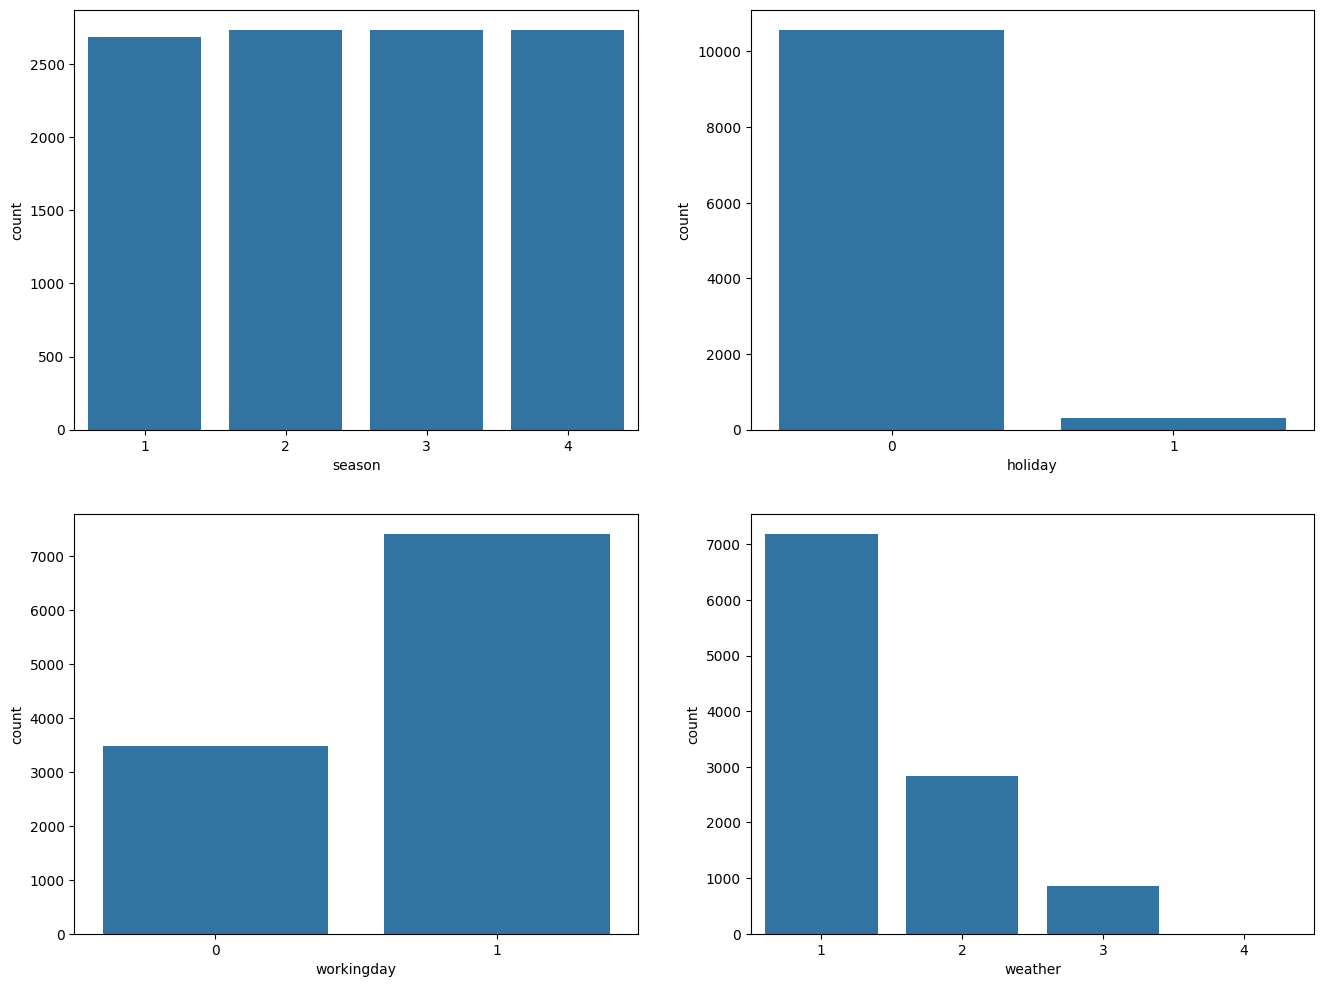

In [ ]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()

**Bi-Variate Analysis**

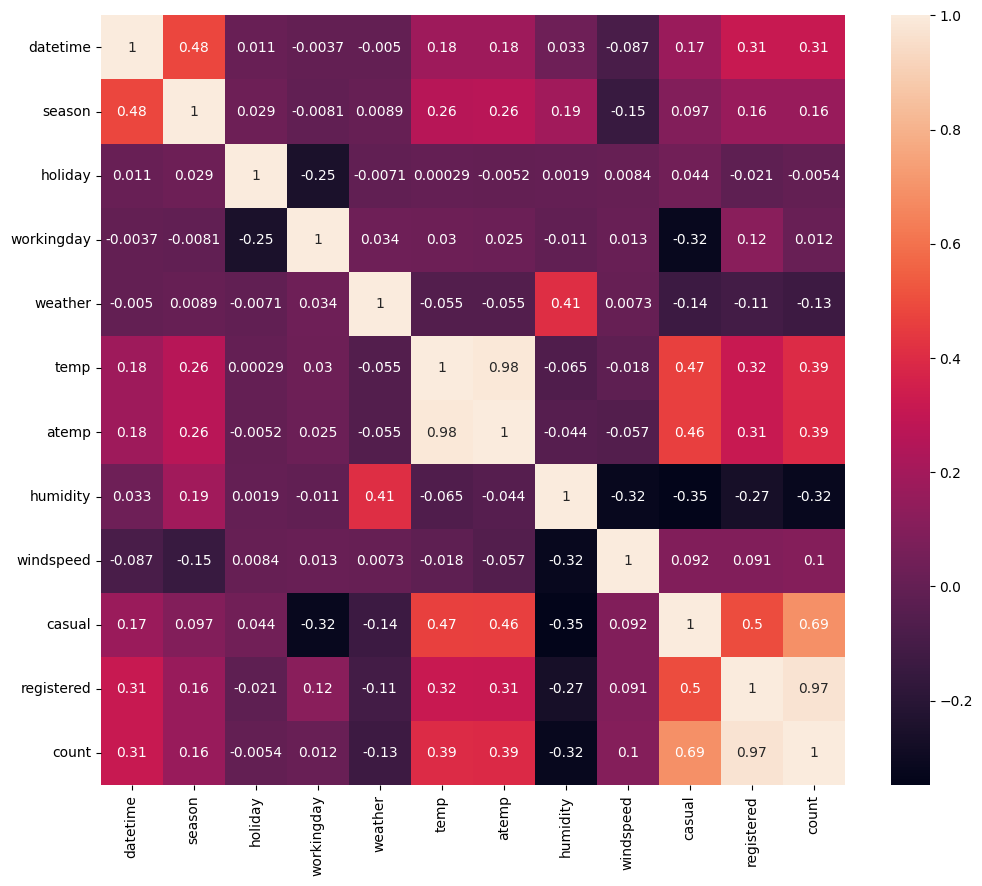

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

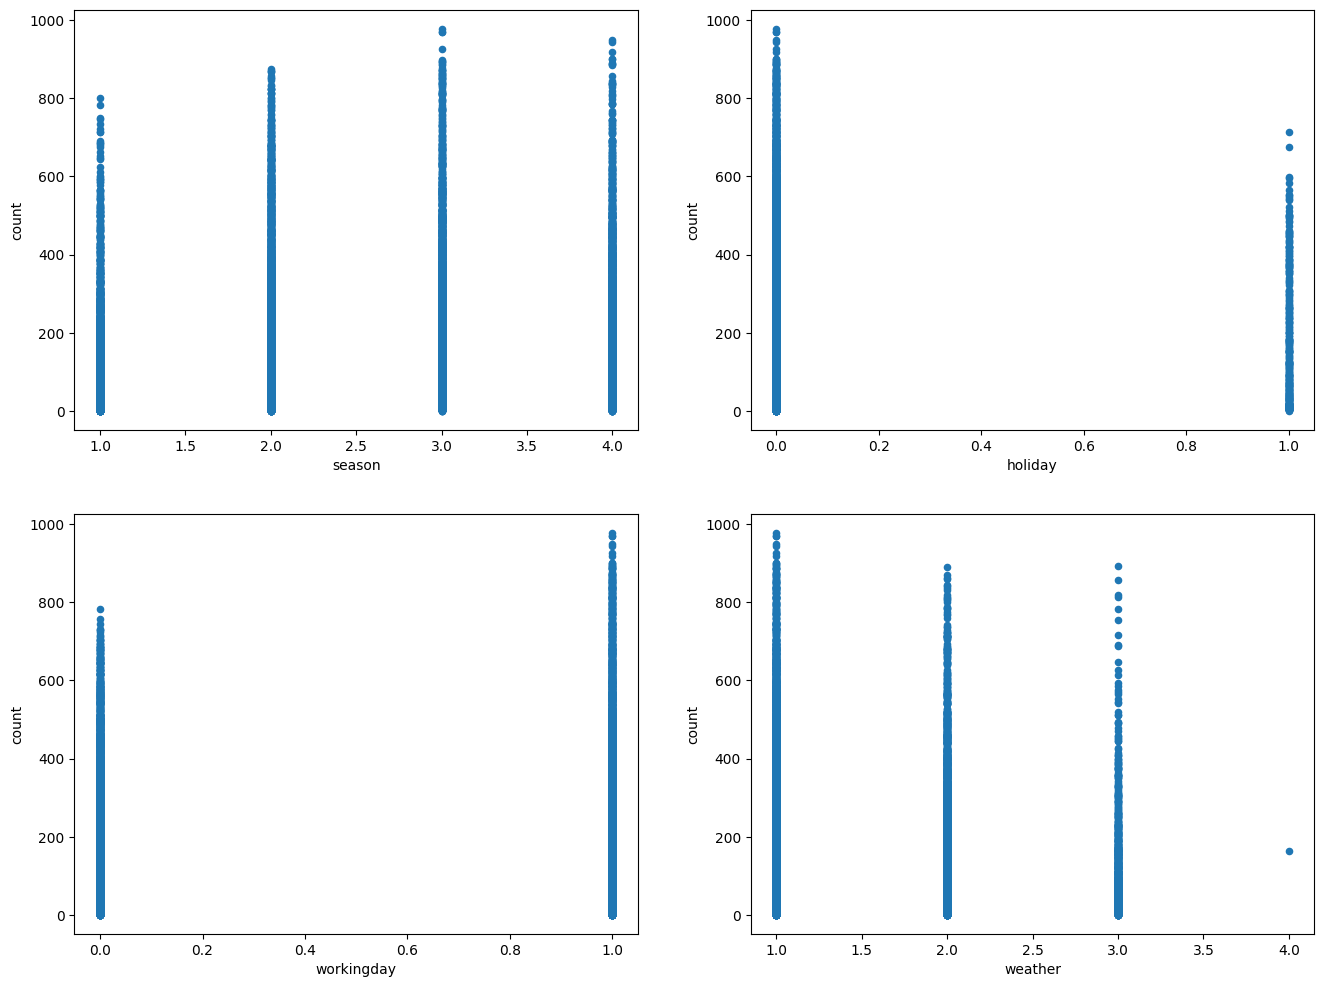

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        df.plot.scatter(x=cat_cols[index], y="count", ax=axis[row, col])
        index += 1

plt.show()


1. As all seasons have equal amount of data, are not that much effective in count.
2.During thunderstrom,rain,fog bikes are rented less in amount.
3.Clear sky, partly clouded weather having high no of rentals in count.

**Hypothesis Testing 1 :**


H0 = Working day has no effect on rental bikes

Ha = Working day has an effect on rental bikes

alpha = 0.05


In [ ]:
No_of_bikesrent_workingday = df[df["workingday"] == 1]["count"].values
No_of_bikesrent_nonworkingday = df[df["workingday"] == 0]["count"].values
alpha = 0.05
print(No_of_bikesrent_workingday)
print(No_of_bikesrent_nonworkingday)
t_stat, p_value = ttest_ind(No_of_bikesrent_workingday,No_of_bikesrent_nonworkingday)
print("t_stat ", t_stat)
print("p value : ", p_value)

[  5   2   1 ... 168 129  88]
[ 16  40  32 ... 106  89  33]
t_stat  1.2096277376026694
p value :  0.22644804226361348


Fail to reject Null Hypothesis

p_value is not less than alpha so we Fail to reject Null Hypothesis.

means we cant say working day has an effect on bike rentals.

**Hypothesis Testing 2 :**

H0 = No of bike rent are similar on different weather and seasons

Ha = No of bike rent are different on different weather and seasons

alpha = 0.05

In [ ]:
weather1 = df[df["weather"] == 1]["count"].values
weather2 = df[df["weather"] == 2]["count"].values
weather3 = df[df["weather"] == 3]["count"].values
weather4 = df[df["weather"] == 4]["count"].values

season1 = df[df["season"] == 1]["count"].values
season2 = df[df["season"] == 2]["count"].values
season3 = df[df["season"] == 3]["count"].values
season4 = df[df["season"] == 4]["count"].values

alpha = 0.05

f_stat, p_value = f_oneway(weather1,weather2,weather3,weather4,season1,season2,season3,season4)
print("f_stat ", f_stat)
print("p value : ", p_value)

f_stat  127.96661249562491
p value :  2.8074771742434642e-185


Reject Null Hypothesis

p_value is less than alpha so we Reject Null Hypothesis.

means we can say No of bike rentals are different on different weather and seasons

**Hypothesis Testing 3 :**

H0 = Weather is independent on Seasons

Ha = Weather is dependent on Seasons

alpha = 0.05

In [ ]:
weather_season = pd.crosstab(index = df["weather"] , columns = df["season"])
weather_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
alpha = 0.05
chi_stat, p_value , dof, expected = chi2_contingency(weather_season)
print(chi_stat)
print(p_value)
print(dof)
print(expected)

49.15865559689363
1.5499250736864862e-07
9
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


Reject Null Hypothesis

p_value is less than alpha so we Reject Null Hypothesis.

means we can say Weather is dependent on Seasons

Recommendations:

1.Clear and partly cloudy weather sees a higher number of rental bike rentals, so we should keep more bikes available on these days.

2.People tend to avoid renting bikes on rainy days.